![SegmentLocal](Images_StudIP/Logo2.png)

*Neural Time Series Data*
# Chapter 6.2: Analyzing EEG Data

In [1]:
# For more interactive plots, you can uncomment the following code:
%matplotlib qt5 

In [2]:
import mne
import os
import numpy as np
import matplotlib.pyplot as plt
from os.path import expanduser
%matplotlib qt

In [ ]:
# Uncomment this line, if you are unsure about the mne-version that you are working with
# mne.sys_info() 
# or simply use the terminal command:
#!mne --version

## 1. Loading and reading EEG data

In [3]:
# TODO
# create path to the file of your EEG Data
home = expanduser("~")
setpath = home+'/Osna/Jupyter_Notebooks_ACC/'

# load the preprocessed EEG data and display its info-attribute
setname = "6_408_RerefInterp.set"
fname = setpath+setname
preprocessed = mne.io.read_raw_eeglab(fname, preload= True)
# print(fname)

<ipython-input-3-26544b575a71>:9: RuntimeWarning: Limited 8 annotation(s) that were expanding outside the data range.
  preprocessed = mne.io.read_raw_eeglab(fname, preload= True)
<ipython-input-3-26544b575a71>:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  preprocessed = mne.io.read_raw_eeglab(fname, preload= True)


['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2', 'AF7', 'AF3', 'AF4', 'AF8', 'F5', 'F1', 'F2', 'F6', 'FC3', 'FCz', 'FC4', 'C5', 'C1', 'C2', 'C6', 'CP3', 'CPz', 'CP4', 'P5', 'P1', 'P2', 'P6', 'PO5', 'PO3', 'PO4', 'PO6', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'VEOG']


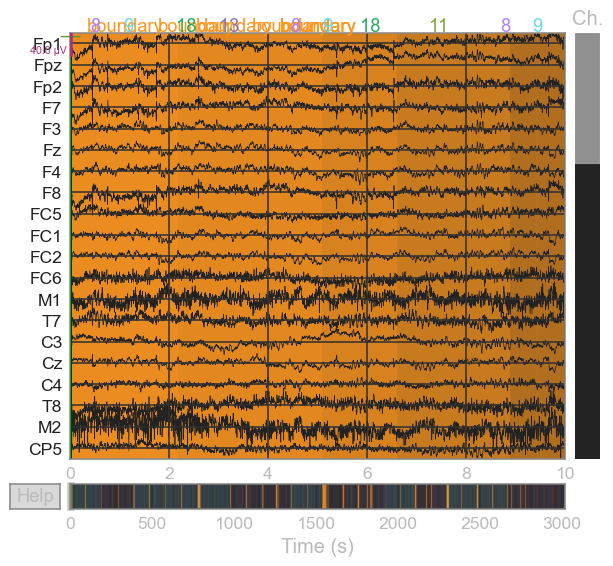

In [4]:
# TODO
# View the info attribute and see what it contains
# print(preprocessed.info)

# # Print all channel-names
print(preprocessed.ch_names)

# Plot all the data but only display 10 channels at once
preprocessed.plot(n_channels = 20)

In order to get an idea about the location of the channels, you can run the follwoing cell. Here we read all the montages that are stored within MNE (a montage relates the channels' names to standardized locations on the scalp surface). We will plot the standard *5% electrode system*, since this is the one that was used for our recordings; additionally they only used 64 of the electrodes.  

<span style=color:#1F618D;font-size:11pt> If you want to know more about this, [here](https://robertoostenveld.nl/electrode/) you can find an interesting blogpost by the "founder" of this specific electrode system, which also gives a short overview of general electrode placement systems.</span>

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 339 unique labels.
Creating RawArray with float64 data, n_channels=339, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


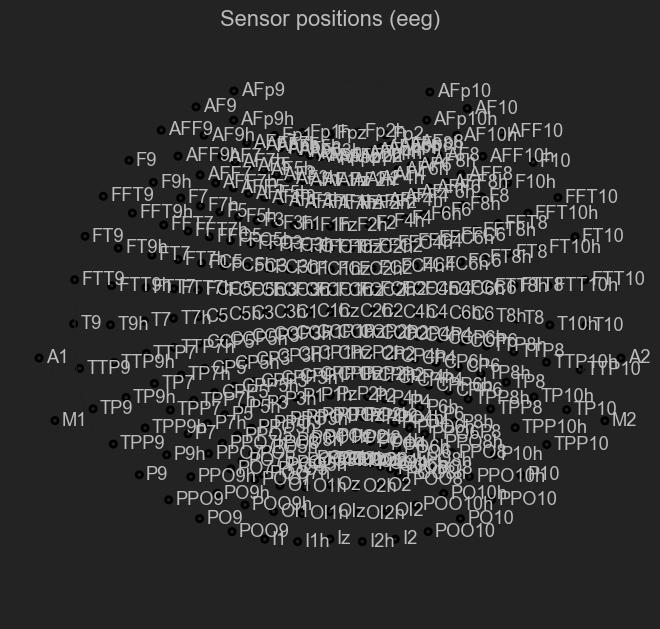

In [5]:
# First, we select the 10-20 system out of all montages that ship with mne:
montage = mne.channels.make_standard_montage("standard_1005")
# Plot 10-20 system in order to visualize location of the channels
mne.viz.plot_montage(montage)
# Tip: When adding the argument kind='3d' you can get an interactive 3D-plot of the montage
# mne.viz.plot_montage(montage, kind='3d')

<ipython-input-8-c8e489160d99>:2: DeprecationWarning: Using ``raise_if_subset`` to ``set_montage``  is deprecated and ``set_dig`` will be  removed in 0.21
  preprocessed.set_montage(montage, raise_if_subset= False)
<ipython-input-8-c8e489160d99>:2: RuntimeWarning: DigMontage is a only a subset of info. There are 1 channel position not present in the DigMontage. The required channels are: ['VEOG']
  preprocessed.set_montage(montage, raise_if_subset= False)


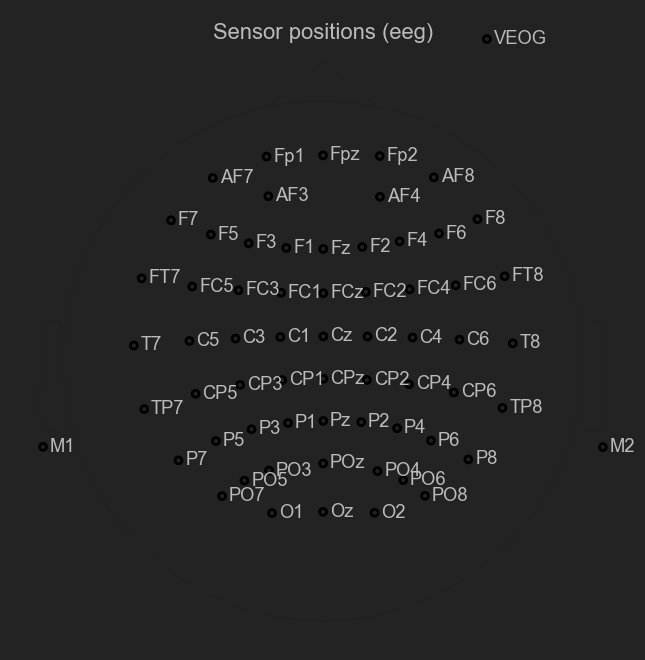

In [8]:
# Assign this montage to our channel locations
preprocessed.set_montage(montage, raise_if_subset= False)
# Plot our channel locations again: do you see a difference to the default plot above?
preprocessed.plot_sensors(show_names=True)

*Check out [this](https://mne.tools/dev/auto_tutorials/intro/plot_40_sensor_locations.html) tutorial, if you want to know more about plotting montages.*

### 1.2 Select and plot a data segment


In [12]:
# TODO
# Acces all data:
data_all, times_all = preprocessed[:]
print(data_all.shape)
print(times_all.shape)

(65, 1546814)
(1546814,)


In [18]:
# TODO
# Select midline frontal electrodes:
ch_select = ['F1', 'Fz', 'F2', 'FC1', 'FCz', 'FC2'] # midline frontal electrodes 
# Define the time segment from 100s-115s
segment = [100,115]


(2,)
<RawEEGLAB | 6_408_RerefInterp.set, 65 x 1546814 (3021.1 s), ~767.2 MB, data loaded>


In [24]:
# TODO
# Plot all channels of a specific time segment, here written as a functions such that the time segment 
# and the channel-selection can be changed easily

def plotSegment(segment, channels):
    # Define "start" and "stop" in terms of the respective indices of the time segment
    start, stop = preprocessed.time_as_index(segment)
    # Get indices of the channels in the channels-list
    ch_index = [preprocessed.ch_names.index(channel) for channel in channels]
    # Slice the data according to the indices above (ch_index, start, stop)
    data, times = preprocessed[ch_index, start:stop]
    # Print shape of "data" and "times" after segmenting 
    print(data.shape)
    print(times.shape)
    # Check whether you sliced your data correctly
    print(times.min(), times.max())
    # Plot all channels
    
    plt.plot(times, data.T)
    plt.title('Data segment between {} seconds, showing channels {}'.format(segment, channels))
    plt.xlabel('Time (s)')
    plt.ylabel('EEG data (T)')
    
    return 

plotSegment(segment, ch_select)

(6, 7680)
(7680,)
100.0 114.998046875


In [31]:
a, b = preprocessed[:]
print(a.shape)
print(b.shape)

(65, 1546814)
(1546814,)


In [29]:
data, times = preprocessed[ch_index, start:stop]

(array([[-3.48641952e-06, -4.40317126e-06, -4.62140505e-06, ...,
          2.19054797e-07,  1.22445428e-07, -4.27233001e-07],
        [-2.26107707e-06, -1.72732355e-06, -1.42969000e-06, ...,
         -9.87535076e-07, -2.04280436e-06, -2.02705261e-06],
        [-2.16993236e-06, -1.03448475e-06, -2.27174565e-07, ...,
         -7.80776595e-07, -2.62692109e-06, -3.78597260e-06],
        [-5.79285411e-06, -5.88119758e-06, -6.34855041e-06, ...,
         -2.01602243e-06, -3.23670145e-06, -3.02057150e-06],
        [ 1.23709356e-06, -3.42659005e-07, -1.68111823e-06, ...,
         -2.68188863e-06, -3.45978972e-06, -4.84968582e-06],
        [-3.73380180e-06, -3.10317279e-06, -1.99858703e-06, ...,
         -2.12897928e-06, -1.88146084e-06, -2.63605667e-06]]),
 array([100.        , 100.00195312, 100.00390625, ..., 114.99414062,
        114.99609375, 114.99804688]))

In [42]:
# TODO
# Plot all channels separately

# Define "start" and "stop" in terms of the respective indices of the time segment
start, stop = preprocessed.time_as_index(segment)

# Get indices of the channels in the channels-list
ch_index = [preprocessed.ch_names.index(channel) for channel in ch_select]
data, times = preprocessed[ch_index, start:stop]

# Plot all channels separately
fig, axes = plt.subplots(6, 1, sharex = True, sharey = True, figsize = (10,8))
fig.add_subplot(111,frameon = False)
plt.tick_params(labelcolor = 'NOne')

plt.title('Data segment between {} seconds, showing channels {}'.format(segment, ch_select), fontsize = 12, pad = 4)
plt.xlabel('Time [s]', fontsize = 10)
plt.ylabel('µV',fontsize = 10, labelpad = 50)
# plt.subplots_adjust(hspace = 0.4)

for i in range(len(ch_select)):
    axes[i].plot(times, data.T[:, i])
    axes[i].set_title(ch_select[i], fontsize = 9)

## 2. Define and read epochs

### 2.1 Find events 

In [43]:
#check out the annotations-object
print("onset of the first 60 events: ", preprocessed.annotations.onset[:60])
print("respective event-codes: ", preprocessed.annotations.description[:60])
print("List of all unique event-codes: ", np.unique(preprocessed.annotations.description))

onset of the first 60 events:  [0.0000000e+00 6.8360000e-03 1.4648000e-02 2.0508000e-02 2.4414000e-02
 2.8320000e-02 3.2227000e-02 4.0039000e-02 5.2148500e-01 1.1708990e+00
 2.3417970e+00 3.2216800e+00 4.5546880e+00 5.2041020e+00 6.0703130e+00
 7.4541020e+00 8.7871100e+00 9.4375000e+00 1.1045899e+01 1.1987305e+01
 1.3320313e+01 1.3969727e+01 1.5222656e+01 1.6169922e+01 1.7787110e+01
 1.8436524e+01 1.9734375e+01 2.0919922e+01 2.2252930e+01 2.2902344e+01
 2.5118164e+01 2.6002930e+01 2.7335938e+01 2.7985352e+01 2.9574219e+01
 3.0469727e+01 3.1802735e+01 3.2452149e+01 3.3262695e+01 3.4218750e+01
 3.5552735e+01 3.6202149e+01 3.7662110e+01 3.8635742e+01 4.0251953e+01
 4.0901367e+01 4.2262695e+01 4.3351563e+01 4.4684570e+01 4.5334961e+01
 4.6846680e+01 4.7717774e+01 4.9050781e+01 4.9701172e+01 5.2510742e+01
 5.3367188e+01 5.4701172e+01 5.5350586e+01 5.6526367e+01 5.7367188e+01]
respective event-codes:  ['__' 'boundary' 'boundary' 'boundary' 'boundary' 'boundary' 'boundary'
 'boundary' '8' '9'

In [47]:
'''Both dicts not working:
events_coop = {'Coop/C': 15, 'Coop/I': 16, 'Coop/CC': 4, 'Coop/II':5, 'Coop/CI': 6, 'Coop/IC': 7}
events_comp = {'Comp/I': 17, 'Comp/I': 18, 'Comp/CC': 13 , 'Comp/II':14, 'Comp/CI': 11, 'Comp/IC': 12}
events_coop2 = dict(zip([str(i) for i in list(events_coop.values())], list(events_coop.keys())))
events_comp2 = dict(zip([str(i) for i in list(events_comp.values())], list(events_comp.keys())))
event_id = {**events_coop2, **events_comp2}

events_test = mne.events_from_annotations(preprocessed, event_id=event_id , regexp='boundary', use_rounding=True, chunk_duration=None, verbose=None)
'''
# Create two dictionaries for each social condition one (competition and cooperation), assigning the events to the eventcodes
events_comp = {'17': 17, '18': 18, '13': 13 , '14':14, '11': 11, '12': 12}
events_coop = {'15': 15, '16': 16, '4': 4, '5':5, '6': 6, '7': 7}

# Combine both dictionaries to a full dict with both social conditons 
# (of course you can do this in one step, but this way it is easier to follow separate them later)
event_id = {**events_coop, **events_comp}

# Finally, use annotations to find events specified in the dictionary
# In order to avoid duplicate samples (first column of the array) we have to set
# the parameter use_rounding=False, this way we can make sure that when the floats of the time-in-seconds of 
# annotations.duration are converted to samples there will be no duplicate samples.
events_from_annot, event_dict = mne.events_from_annotations(preprocessed, event_id=event_id, use_rounding=False)
print(event_dict)
print(events_from_annot)

Used Annotations descriptions: ['11', '12', '13', '14', '15', '16', '17', '18', '4', '5', '6', '7']
{'11': 11, '12': 12, '13': 13, '14': 14, '15': 15, '16': 16, '17': 17, '18': 18, '4': 4, '5': 5, '6': 6, '7': 7}
[[   1199       0      18]
 [   1649       0      13]
 [   3108       0      18]
 ...
 [1543343       0       6]
 [1544865       0      16]
 [1545852       0       6]]


In [ ]:
# TODO
# For the Vips:
# Print number of unique event-codes to answer Vip-question number 4 (2.1. Find events)
print("Number of unique event-codes: ")

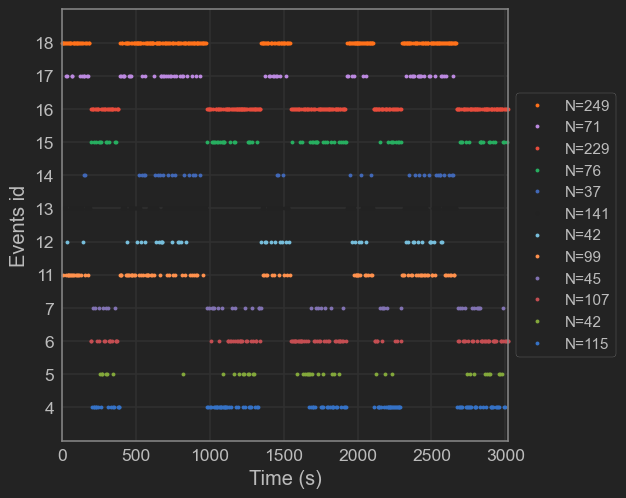

In [48]:
mne.viz.plot_events(events_from_annot, preprocessed.info['sfreq'])

### 2.2 Create epochs

In [49]:
# TODO
# 1. Define epoch parameters
tmin = -0.2# start of each epoch (200ms before the trigger)
tmax = 0.5# end of each epoch (500ms after the trigger)

# 2. Create Epochs
epochs = mne.Epochs(preprocessed, events_from_annot, event_id, tmin, tmax, proj = True, preload = False)

# For the Vips
# Get single epochs for one condition:
epochs_data_select = epochs['14'].get_data()

# Print number of epochs for this condition, in order to answer VIP-question number 6 (3.1 Compute ERPs):
print('Number of Epochs for trigger 14: ', epochs_data_select.shape[0])

# 3. Check how many epochs have been created for all conditions 
print(epochs)

1253 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 37 events and 359 original time points ...
0 bad epochs dropped
Number of Epochs for trigger 14:  37
<Epochs  |   1253 events (good & bad), -0.199219 - 0.5 sec, baseline [None, 0], ~168 kB, data not loaded,
 '11': 99
 '12': 42
 '13': 141
 '14': 37
 '15': 76
 '16': 229
 '17': 71
 '18': 249
 '4': 115
 '5': 42
 '6': 107
 '7': 45>


## 3. Compute  and plot Evoked responses for different conditions 

### 3.1 Compute ERPs

In [ ]:
# TODO
# Create ERPs with respect to Win/ Loose events of both social situations
evoked_dict = dict()
evoked_dict['Coop/Win'] = 
evoked_dict['Coop/Loose'] =
evoked_dict['Comp/Win'] = 
evoked_dict['Comp/Loose'] =
print(evoked_dict)

## Citation

[Czeszumski, A., Ehinger, B., Wahn, B., and Knig, P. (2019). *The social situation affects how we process feedback about our actions*. Frontiers in Psychology, 10:361.](https://www.frontiersin.org/articles/10.3389/fpsyg.2019.00361/full)

Oostenveld, Robert & Praamstra, Peter. (2001). *The five percent electrode system for high-resolution EEG and ERP measurements*. Clinical neurophysiology : official journal of the International Federation of Clinical Neurophysiology. 112.